In [1]:
import json
import numpy as np

import sys
sys.path.append('..')
from semplotlib import plot_metric_heatmap_quantifiers

metrics = ["f1", "accuracy", "matthews_correlation"]
quantifiers = ["all", "any", "each", "few", "many", "much", "no", "several", "some", "whole"]

f1


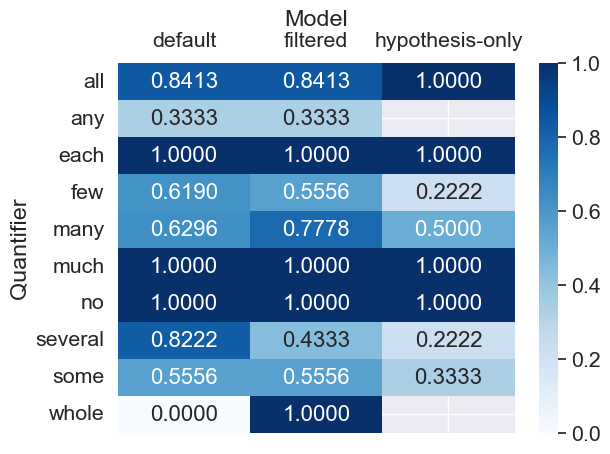

accuracy


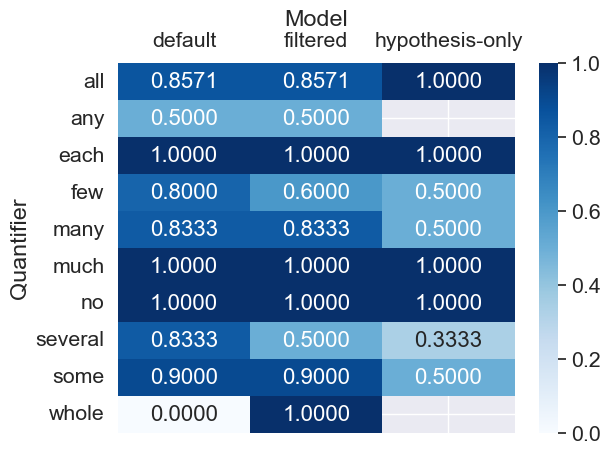

matthews_correlation


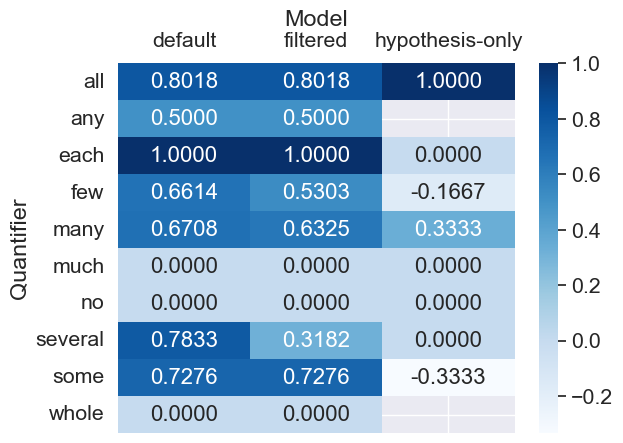

In [2]:
path_mapping = {
    "default": "../scripts/analyze_quantifiers/results/roberta-base-finetuned-mnli.json",
    "filtered": "../scripts/analyze_quantifiers/results/roberta-base-finetuned-mnli-maximum_two_6.json",
    "hypothesis-only": "../scripts/analyze_quantifiers/results/roberta-base-finetuned-mnli-hypothesis-only.json"
}

for metric in metrics:
    metric_data = []
    for model in path_mapping.items():
        model_data = []
        with open(model[1], "r") as f:
            metrics_data = json.load(f)
            for quantifier in quantifiers:
                try:
                    quantifier_data = next(item for item in metrics_data if item["task_name"] == quantifier)
                    model_data.append(quantifier_data[metric])
                except StopIteration:
                    model_data.append(np.NaN)
        metric_data.append(model_data)
    print(metric)
    plot_metric_heatmap_quantifiers(np.array(metric_data).T, save_path=f"../report/images/metric_heatmaps_quantifiers/{metric}.pdf")